# Курсовой проект: Алгоритмы анализа данных

### Задача

Ваша задача этом соревновании - предсказать средний балл на экзамене по математике, который получают ученики репетиторов из датасета test.csv. Вам будут даны два датасета: train.csv (содержит признаки и целевую переменную) и test.csv (только признаки).

### Наименование файлов с данными

train.csv - обучающий датасет<br>
test.csv - тестовый датасет

### Описание признаков

Id - айди
<br>age - возраст преподавателя
<br>years_of_experience - стаж преподавателя
<br>lesson_price - стоимость урока
<br>qualification - квалификация преподавателя
<br>physics - преподает ли физику
<br>chemistry - преподает ли химию
<br>biology - преподает ли биологию
<br>english - преподает ли английский
<br>geography - преподает ли географию
<br>history - преподает ли историю
<br>mean_exam_points - целевое значение, средний балл за экзамен учеников

### Целевая переменная

mean_exam_points - средний балл за экзамен учеников

### Метрика качества

Coefficient of determination:

\[R^2=1−\frac{σ^2}{σ^2_y}\]

### Требования к решению

You can only use these imports:

import numpy as np<br>
import pandas as pd<br>
from sklearn.model_selection import train_test_split<br>
import matplotlib.pyplot as plt<br>
import seaborn as sns<br>

### Подключение библиотек и скриптов

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def distribution_plot(series, label):
    """График распределения"""
    plt.figure(figsize=(16, 8))

    mean = round(series.mean(), 2)
    median = series.median()

    plt.subplot(121)
    series.hist(density=False, bins=20)
    plt.ylabel('count')
    plt.xlabel(label)

    y = np.linspace(0, 2000, 2)
    plt.plot([mean] * 2, y, label='mean', linewidth=4)
    plt.plot([median] * 2, y, label='median', linewidth=4)
    plt.legend()

    plt.subplot(122)
    sns.kdeplot(series, shade=True, legend=False)
    plt.xlabel(label)

    plt.suptitle(label)
    plt.show()

In [3]:
def distribution_plot_sns(df, column):
    s = df[column]
    distribution_plot(s, column)
    sns.boxplot(x=s, whis=1.5)

### Пути к директориям и файлам

In [4]:
TRAIN_DATASET_PATH = 'csv/train.csv'
TEST_DATASET_PATH = 'csv/test.csv'
RESULT_DATASET_PATH = 'csv/MSDoroshenko_predictions.csv'

### Загрузка данных

In [5]:
df = pd.read_csv(TRAIN_DATASET_PATH)
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,61
1,1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,76
2,2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53
3,3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,54
4,4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,57


In [6]:
df.drop(columns=['Id']).describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,63.737300
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,14.705574
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


In [7]:
df.shape

(10000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 937.6 KB


In [9]:
df.isna().sum()

Id                     0
age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

In [10]:
df.nunique()

Id                     10000
age                       46
years_of_experience       11
lesson_price              74
qualification              4
physics                    2
chemistry                  2
biology                    2
english                    2
geography                  2
history                    2
mean_exam_points          69
dtype: int64

In [11]:
df["years_of_experience"].value_counts()

0.0     2785
2.0     1804
1.0     1757
3.0     1572
4.0     1122
5.0      584
6.0      282
7.0       70
8.0       20
9.0        3
10.0       1
Name: years_of_experience, dtype: int64

### Распределение признаков

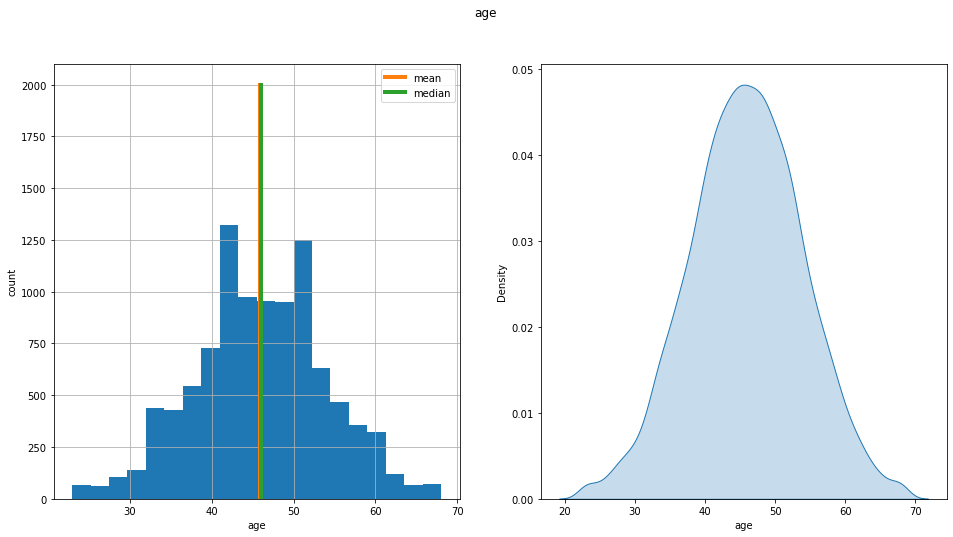

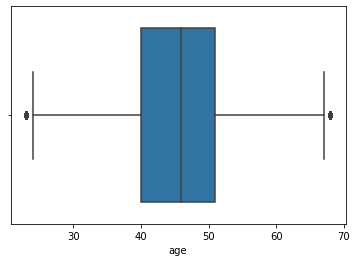

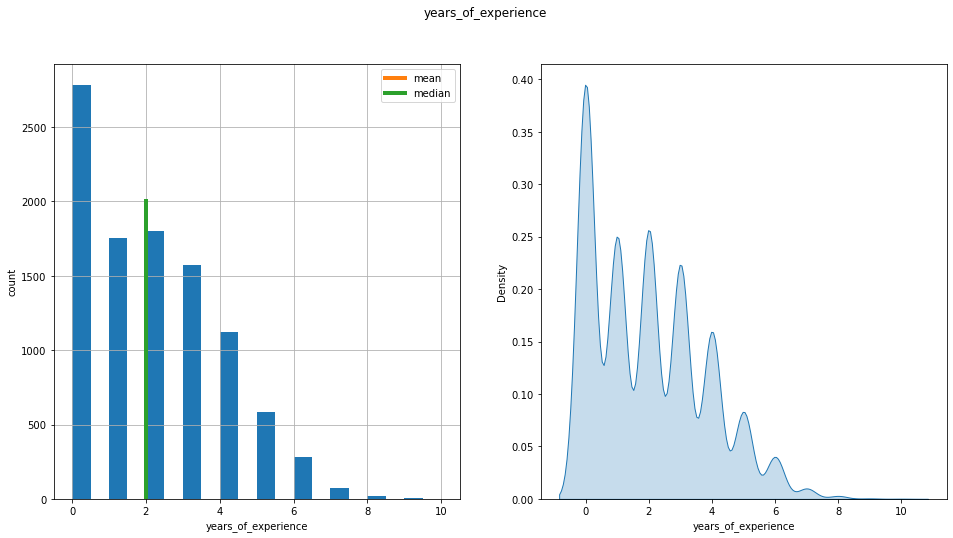

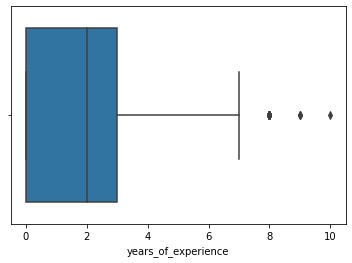

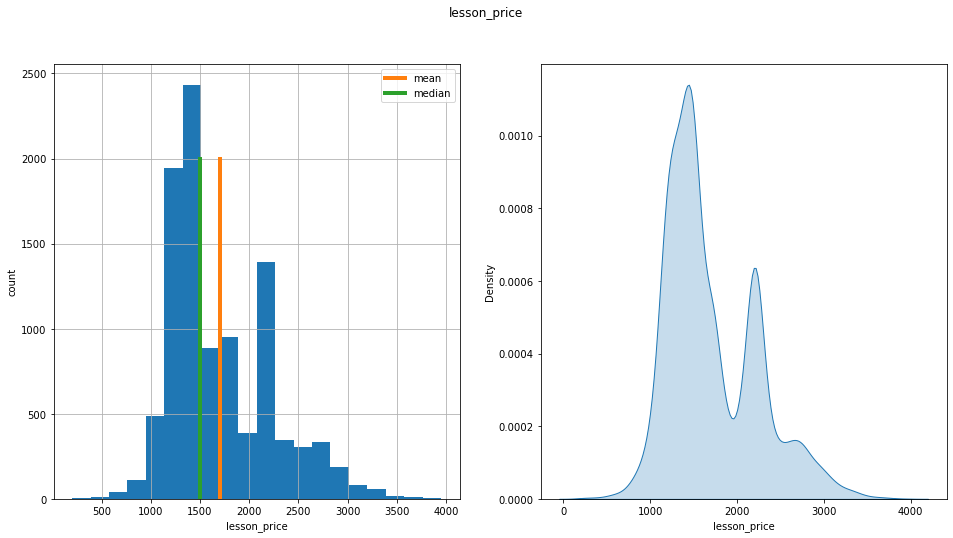

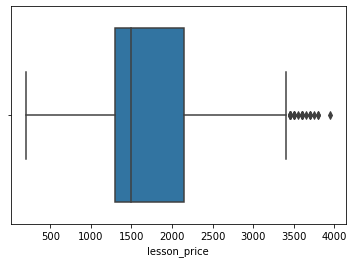

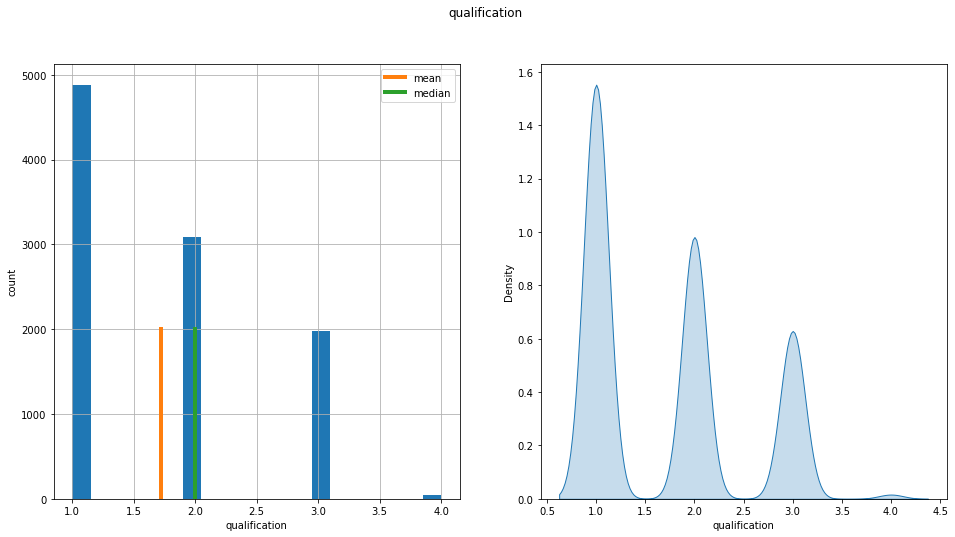

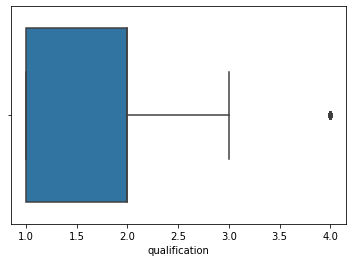

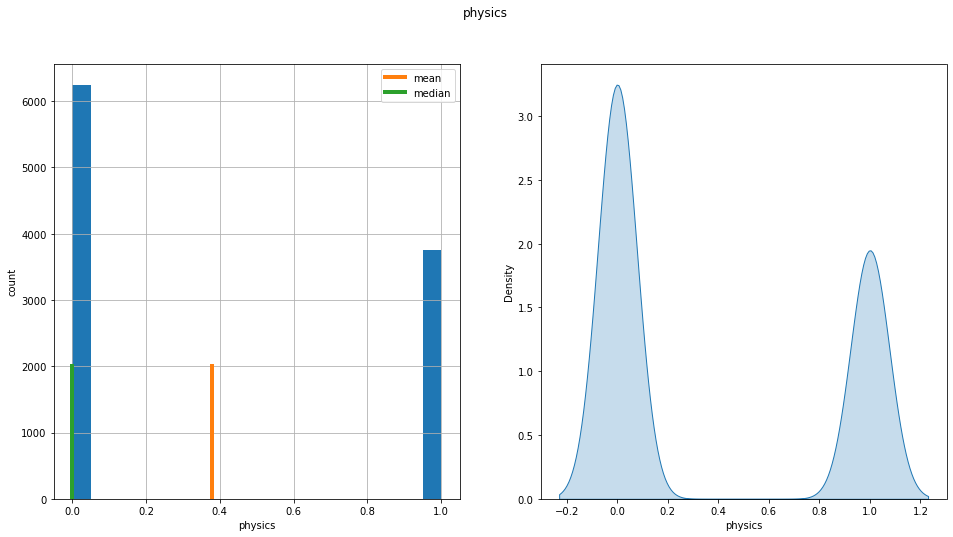

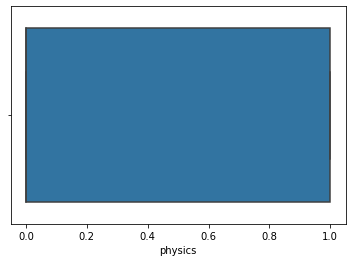

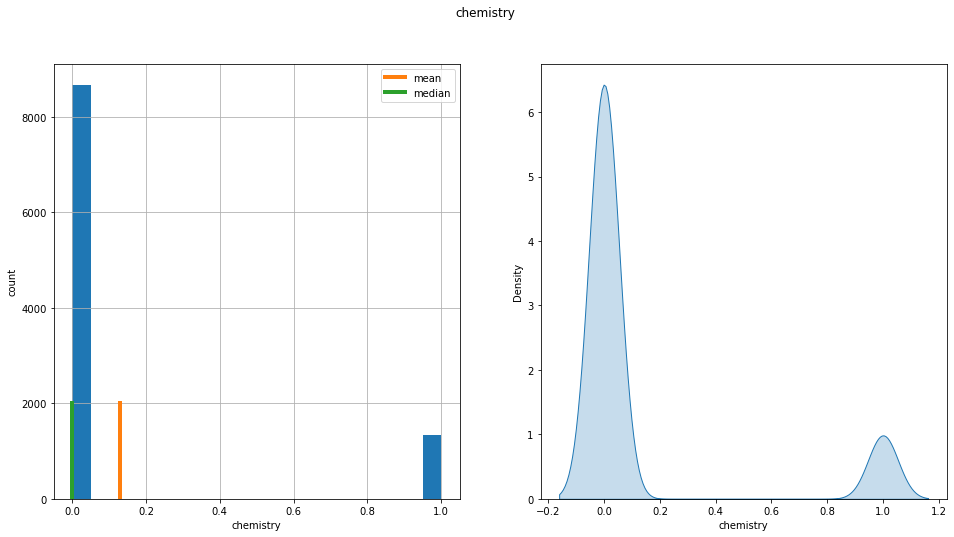

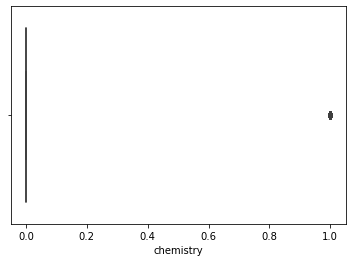

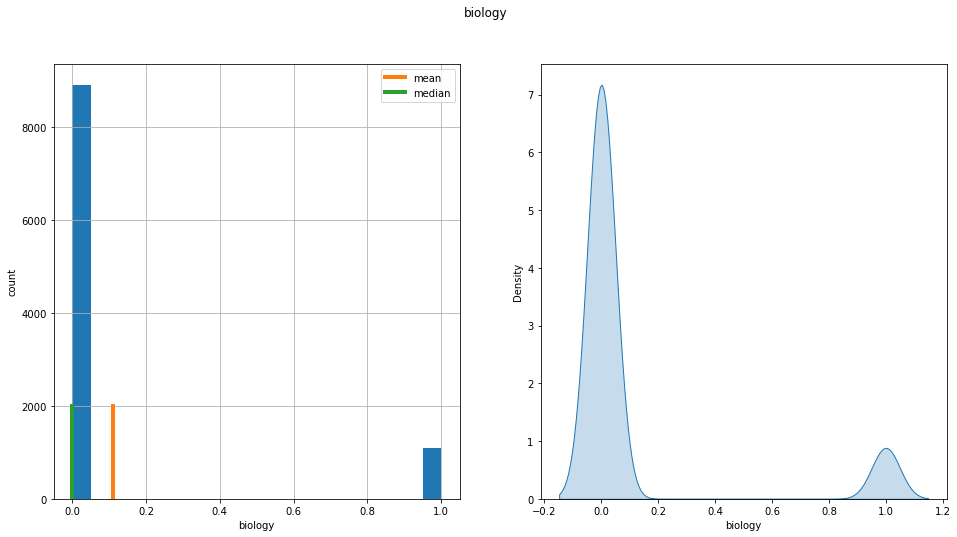

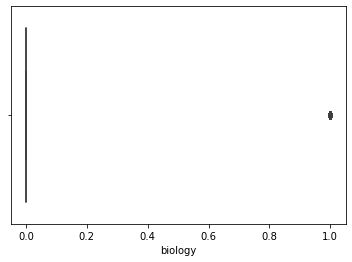

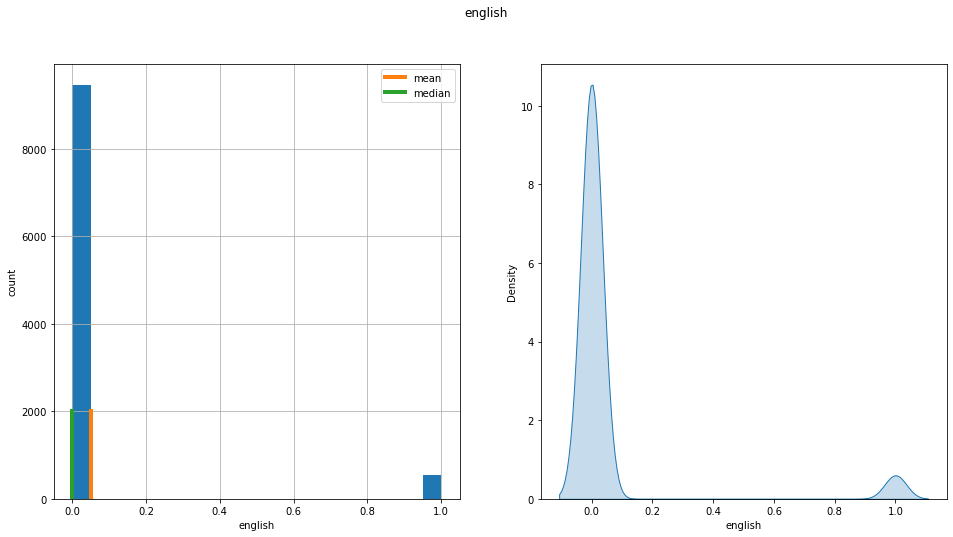

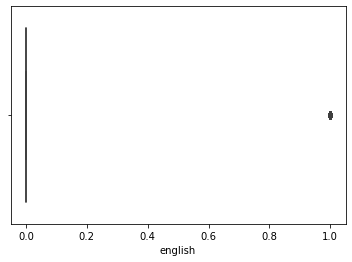

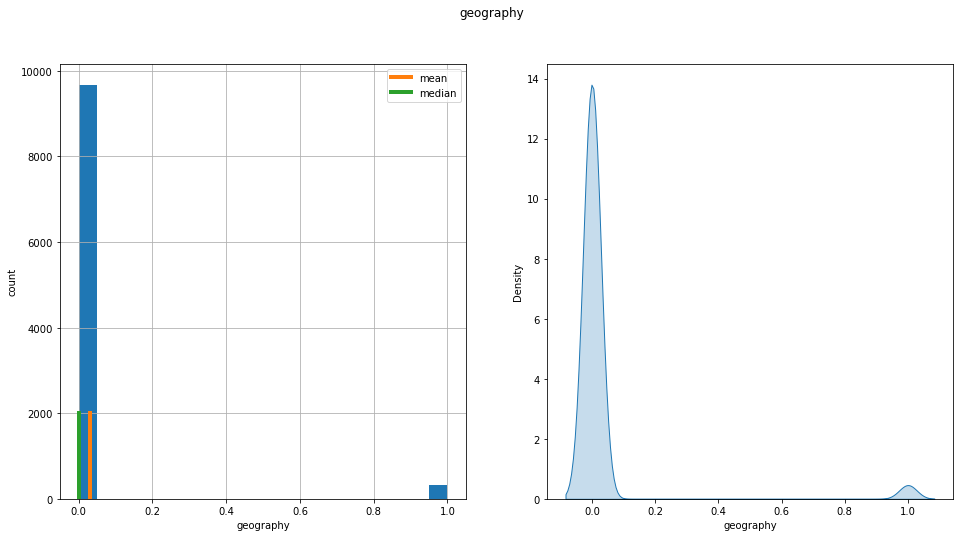

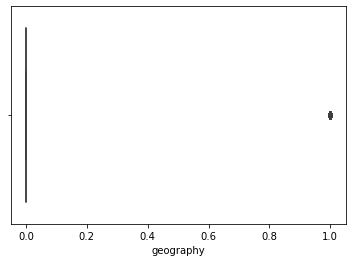

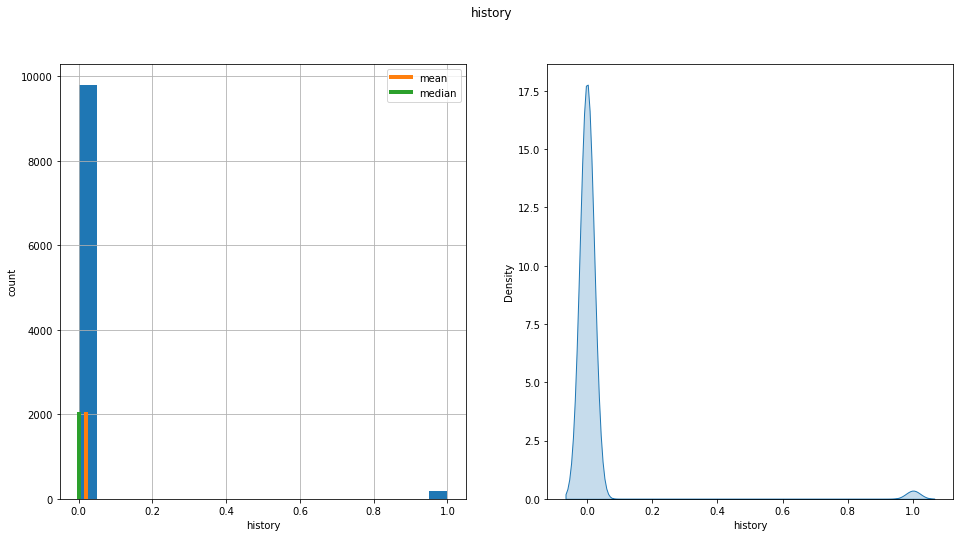

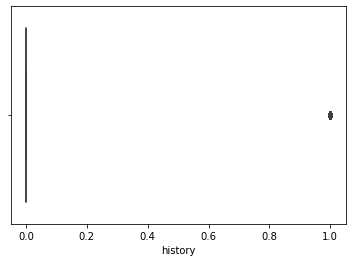

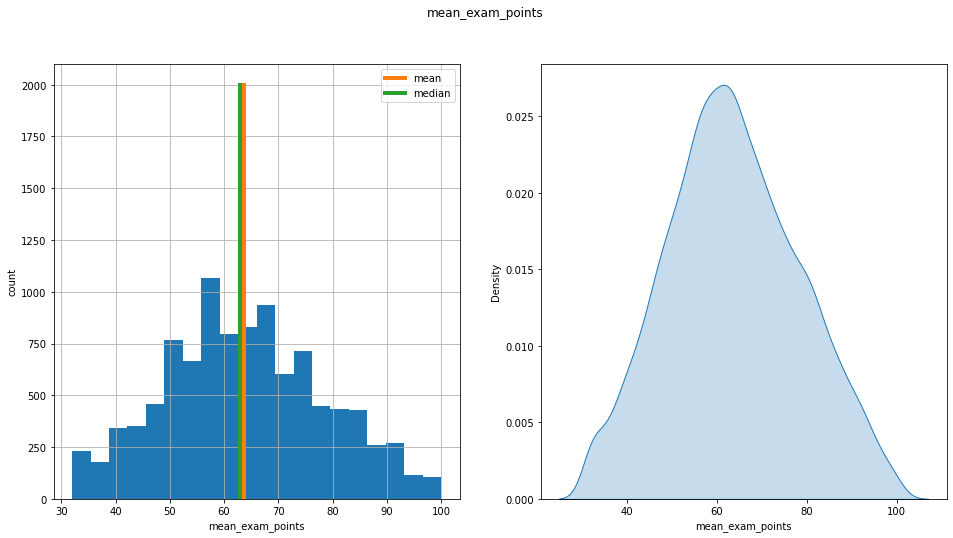

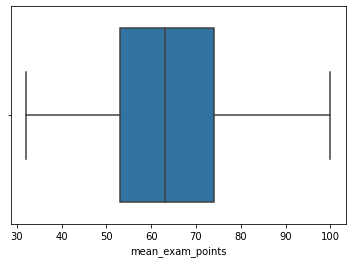

In [12]:
for c in df.drop(columns=["Id"]).columns:
    distribution_plot_sns(df, c)

### Первичный анализ

- Пропусков нет
- Минимум 6 категориальных признаков
- qualification также, скорее всего, категориальный признак
- Возможны бесполезные признаки. Проверить через матрицу корреляций.
- Рассмотреть различные варианты понижения размерности и создания новых признаков:
    1. Объединить все предметы в один признак
    2. Возраст, опыт и стоимость выделить по группам
- Проверить на выбросы
- Не учитывать признак id в прогнозе
- years_of_experience: от 0 до 10 лет, только целые значения. Возможно перевести тип в numpy.int8.
- years_of_experience: малое количество после 7, возможно объединить. Предполагаю, что дальнейшее повышение опыта не сильно сказывается на балле.
- lesson_price: возможно разделить на 3-4 группы
- предметы: английский, география и история - подавляющее большинство = 0. Предметы не технические, сомневаюсь что они влият на подготовку к экзамену по математике. Возможно объединить в один признак "Остальные предметы".
- Целевая переменная распределена около-нормально. Выбросов нет.
- Следует использовать модели с деревьями, т.к. большинство параметров категориальные.
- Следить за переобучением, т.к. полезных признаков мало.

In [13]:
features = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english', 'geography', 'history']
target = ['mean_exam_points']

In [14]:
x = np.array(df[features])
y = np.array(df[target])

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1)

### Метрика R2

In [23]:
def r2(pred, test):
    correlation_matrix = np.corrcoef(pred, test)
    correlation_xy = correlation_matrix[0,1]
    r_squared = correlation_xy**2
    return r_squared

### Дерево решений

In [16]:
class Node:
    """Класс узла"""
    
    def __init__(self, index, t, true_branch, false_branch):
        self.index = index  # индекс признака, по которому ведется сравнение с порогом в этом узле
        self.t = t  # значение порога
        self.true_branch = true_branch  # поддерево, удовлетворяющее условию в узле
        self.false_branch = false_branch  # поддерево, не удовлетворяющее условию в узле


class Leaf:
    """Rласс терминального узла (листа)"""
    
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.prediction = y.mean()    


class DecisionTreeRegressor:
    """Дерево решений для регрессии"""
    
    def __init__(self, min_leaf_samples, max_depth):
        self.min_leaf_samples = min_leaf_samples #  минимальное количество объектов в узле
        self.max_depth = max_depth # максимальная глубина
        self.cur_depth = 0 # текущая глубина
        
        
    def mse(self, y_pred, y_valid):
        """MSE"""
        return ((y_pred - y_valid) ** 2).sum() / len(y_pred)
        
        
    def gain(self, left_target_values, right_target_values, root_mse):
        """Прирост качества"""

        v_left = left_target_values - left_target_values.mean()
        v_right = right_target_values - right_target_values.mean()

        v_full = np.concatenate((v_left, v_right), axis=None)
        mse_split = (v_full ** 2).sum() / len(v_full)

        return root_mse - mse_split
    

    def split(self, X, y, column_index, t):
        """Разбиение датасета в узле"""

        left = np.where(X[:, column_index] <= t)
        right = np.where(X[:, column_index] > t)

        true_X = X[left]
        false_X = X[right]

        true_y = y[left]
        false_y = y[right]

        return true_X, false_X, true_y, false_y
    

    def get_subsample(self, len_sample):
        """Генерация индексов случайных признаков для разбиения"""

        sample_indexes = list(range(len_sample))

        len_subsample = int(np.sqrt(len_sample))

        subsample = np.random.choice(sample_indexes, size=len_subsample, replace=False)

        return subsample


    def find_best_split(self, X, y, min_leaf_samples):
        """Нахождение наилучшего разбиения"""

        root_mse = self.mse(y, y.mean())

        best_gain = 0
        best_t = None
        best_index = None

        n_features = X.shape[1]

        feature_subsample_indices = self.get_subsample(n_features) # выбираем случайные признаки

        for index in feature_subsample_indices:
            # будем проверять только уникальные значения признака, исключая повторения
            t_values = np.unique(X[:, index])

            for t in t_values:
                true_X, false_X, true_y, false_y = self.split(X, y, index, t)
                #  пропускаем разбиения, в которых в узле остается менее 5 объектов
                if len(true_X) < min_leaf_samples or len(false_X) < min_leaf_samples:
                    continue

                current_gain = self.gain(true_y, false_y, root_mse)

                #  выбираем порог, на котором получается максимальный прирост качества
                if current_gain > best_gain:
                    best_gain, best_t, best_index = current_gain, t, index

        return best_gain, best_t, best_index


    def build_tree(self, X, y):
        """Построение дерева"""
        gain, t, index = self.find_best_split(X, y, self.min_leaf_samples)

        #  Базовый случай - прекращаем рекурсию, когда нет прироста в качества
        if gain == 0 or self.cur_depth >= self.max_depth:
            return Leaf(X, y)

        self.cur_depth += 1

        true_X, false_X, true_y, false_y = self.split(X, y, index, t)

        # Рекурсивно строим два поддерева
        true_branch = self.build_tree(true_X, true_y)
        false_branch = self.build_tree(false_X, false_y)

        # Возвращаем класс узла со всеми поддеревьями, то есть целого дерева
        return Node(index, t, true_branch, false_branch)
    
    
    def fit(self, X, y):
        """Обучение дерева"""
        return self.build_tree(X, y)

### Случайный лес

In [17]:
class RandomForestRegressor:
    """Случайный лес"""
    
    def __init__(self, n_trees, max_depth, min_leaf_samples):
        self.n_trees = n_trees # Количество деревьев
        self.max_depth = max_depth # Максимальная глубина дерева
        self.min_leaf_samples = min_leaf_samples # Минимальный размер листа
        self.forest = []
        
    
    def get_bootstrap(self, X, y, N):
        """Генерация выборок"""
        n_samples = X.shape[0] # размер совпадает с исходной выборкой
        bootstrap = []
        for i in range(N):

            sample_index = np.random.randint(0, n_samples, size=n_samples)
            b_x = X[sample_index]
            b_y = y[sample_index]

            bootstrap.append((b_x, b_y))

        return bootstrap
        
    
    def fit(self, X, y):
        """Обучение случайного леса"""
        
        self.forest = []
        bootstrap = self.get_bootstrap(X, y, self.n_trees)

        for b_x, b_y in bootstrap:
            tree = DecisionTreeRegressor(max_depth=self.max_depth, min_leaf_samples=self.min_leaf_samples)
            self.forest.append(tree.fit(b_x, b_y))
    
    
    def predict_object(self, obj, node):
        """Предсказание для отдельного объекта (проход по дереву и поиск подходящего листа исходя из признаков объекта)"""

        #  Останавливаем рекурсию, если достигли листа
        if isinstance(node, Leaf):
            answer = node.prediction
            return answer

        if obj[node.index] <= node.t:
            return self.predict_object(obj, node.true_branch)
        else:
            return self.predict_object(obj, node.false_branch)
    

    def predict_by_tree(self, X, tree):
        """Формирование предсказания по выборке на одном дереве"""
        
        predictions = []
        for obj in X:
            prediction = self.predict_object(obj, tree)
            predictions.append(prediction)
        return predictions
    

    def predict(self, y):
        """Предсказание по лесу деревьев"""

        predictions_per_object = np.zeros(len(y))
        for tree in self.forest:
            predictions_per_object += self.predict_by_tree(y, tree)

        voted_predictions = []
        voted_predictions = np.array(predictions_per_object) / len(self.forest)

        return voted_predictions

In [18]:
rfr = RandomForestRegressor(50, 50, 5)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

r2(y_pred, y_test.reshape(-1))


0.5779188732366841

### Поиск оптимальный параметров

In [38]:
# a_n_trees = np.arange(1, 50, 5)
# a_max_depth = np.arange(1, 30, 2)
# a_min_leaf_samples = np.arange(2, 20, 2)

# best_n_trees = 0
# best_max_depth = 0
# best_min_leaf_samples = 0

# best_r2 = 0

# for n_trees in a_n_trees:
#     for max_depth in a_max_depth:
#         for min_leaf_samples in a_min_leaf_samples:
#             rfr = RandomForestRegressor(n_trees=n_trees, max_depth=max_depth, min_leaf_samples=min_leaf_samples)
#             rfr.fit(X_train, y_train)

#             y_pred = rfr.predict(X_test)

#             r2_test = r2(y_pred, y_test.reshape(-1))
            
#             if r2_test > best_r2:
#                 best_r2 = r2_test
#                 best_n_trees = n_trees
#                 best_max_depth = max_depth
#                 best_min_leaf_samples = min_leaf_samples
                
#                 print(f'Found new best r2: {r2_test}; n_trees: {n_trees}, max_depth: {max_depth}, min_leaf_samples: {min_leaf_samples}')

Вывод:
<br>Found new best r2: 0.4492706665126013; n_trees: 1, max_depth: 1, min_leaf_samples: 2
<br>Found new best r2: 0.45351210297558536; n_trees: 1, max_depth: 1, min_leaf_samples: 14
<br>Found new best r2: 0.4947012051989326; n_trees: 1, max_depth: 3, min_leaf_samples: 6
<br>Found new best r2: 0.4980362173790397; n_trees: 1, max_depth: 5, min_leaf_samples: 6
<br>Found new best r2: 0.5172813020155064; n_trees: 1, max_depth: 5, min_leaf_samples: 10
<br>Found new best r2: 0.5349022879470638; n_trees: 1, max_depth: 5, min_leaf_samples: 18
<br>Found new best r2: 0.5457464042694359; n_trees: 1, max_depth: 7, min_leaf_samples: 4
<br>Found new best r2: 0.5488875468939087; n_trees: 1, max_depth: 13, min_leaf_samples: 14
<br>Found new best r2: 0.5545797678131139; n_trees: 1, max_depth: 13, min_leaf_samples: 16
<br>Found new best r2: 0.5602397260289607; n_trees: 1, max_depth: 23, min_leaf_samples: 8
<br>Found new best r2: 0.5608418102337782; n_trees: 6, max_depth: 3, min_leaf_samples: 10
<br>Found new best r2: 0.5692499005435308; n_trees: 6, max_depth: 7, min_leaf_samples: 4
<br>Found new best r2: 0.5753632601153548; n_trees: 6, max_depth: 7, min_leaf_samples: 18
<br>Found new best r2: 0.5754712761653425; n_trees: 6, max_depth: 9, min_leaf_samples: 16
<br>Found new best r2: 0.580199943371788; n_trees: 6, max_depth: 21, min_leaf_samples: 10
<br>Found new best r2: 0.5832140529163682; n_trees: 6, max_depth: 23, min_leaf_samples: 2
<br>Found new best r2: 0.5945707096634449; n_trees: 6, max_depth: 25, min_leaf_samples: 14

In [36]:
rfr = RandomForestRegressor(n_trees=6, max_depth=25, min_leaf_samples=14)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

r2(y_pred, y_test.reshape(-1))

0.5568869448872983

In [37]:
y_train_pred = rfr.predict(X_train)

r2(y_train_pred, y_train.reshape(-1))

0.5877031042359736

Переобучения практически нет, можно уточнить параметры

In [39]:
a_n_trees = np.arange(3, 7)
a_max_depth = np.arange(1, 26, 1)
a_min_leaf_samples = np.arange(2, 14, 1)

best_n_trees = 0
best_max_depth = 0
best_min_leaf_samples = 0

best_r2 = 0

for n_trees in a_n_trees:
    for max_depth in a_max_depth:
        for min_leaf_samples in a_min_leaf_samples:
            rfr = RandomForestRegressor(n_trees=n_trees, max_depth=max_depth, min_leaf_samples=min_leaf_samples)
            rfr.fit(X_train, y_train)

            y_pred = rfr.predict(X_test)

            r2_test = r2(y_pred, y_test.reshape(-1))
            
            if r2_test > best_r2:
                best_r2 = r2_test
                best_n_trees = n_trees
                best_max_depth = max_depth
                best_min_leaf_samples = min_leaf_samples
                
                print(f'Found new best r2: {r2_test}; n_trees: {n_trees}, max_depth: {max_depth}, min_leaf_samples: {min_leaf_samples}')

Found new best r2: 0.4136101642372907; n_trees: 3, max_depth: 1, min_leaf_samples: 2
Found new best r2: 0.44267396822474486; n_trees: 3, max_depth: 1, min_leaf_samples: 3
Found new best r2: 0.4484296869655704; n_trees: 3, max_depth: 1, min_leaf_samples: 8
Found new best r2: 0.47884737652518594; n_trees: 3, max_depth: 1, min_leaf_samples: 11
Found new best r2: 0.5064716597625085; n_trees: 3, max_depth: 1, min_leaf_samples: 13
Found new best r2: 0.523692528872554; n_trees: 3, max_depth: 2, min_leaf_samples: 2
Found new best r2: 0.5361320105396207; n_trees: 3, max_depth: 2, min_leaf_samples: 3
Found new best r2: 0.5454268818568878; n_trees: 3, max_depth: 3, min_leaf_samples: 7
Found new best r2: 0.5463598542592801; n_trees: 3, max_depth: 4, min_leaf_samples: 11
Found new best r2: 0.5471771510033083; n_trees: 3, max_depth: 4, min_leaf_samples: 13
Found new best r2: 0.5505974657167163; n_trees: 3, max_depth: 5, min_leaf_samples: 10
Found new best r2: 0.5639333625842915; n_trees: 3, max_dept

In [43]:
rfr = RandomForestRegressor(n_trees=4, max_depth=24, min_leaf_samples=10)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

r2(y_pred, y_test.reshape(-1))

0.5910293462753462

In [44]:
y_train_pred = rfr.predict(X_train)

r2(y_train_pred, y_train.reshape(-1))

0.6070250427751658

Переобучения нет.
<br>Оптимальные параметры:
<br>n_trees: 4, max_depth: 24, min_leaf_samples: 10

#### Теория: предметы кроме физики и английского не влияют на итоговый бал по математике

In [46]:
df.columns

Index(['Id', 'age', 'years_of_experience', 'lesson_price', 'qualification',
       'physics', 'chemistry', 'biology', 'english', 'geography', 'history',
       'mean_exam_points'],
      dtype='object')

In [47]:
features = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'english']
target = ['mean_exam_points']

In [48]:
x = np.array(df[features])
y = np.array(df[target])

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [58]:
rfr = RandomForestRegressor(n_trees=4, max_depth=24, min_leaf_samples=10)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

r2(y_pred, y_test.reshape(-1))

0.5700014443502166

In [59]:
y_train_pred = rfr.predict(X_train)

r2(y_train_pred, y_train.reshape(-1))

0.5862722011426199

Вывод: Теория не подтвердилась

### Финальное предсказание

In [63]:
features = ['age', 'years_of_experience', 'lesson_price', 'qualification', 'physics', 'chemistry', 'biology', 'english', 'geography', 'history']
target = ['mean_exam_points']

X_train = x = np.array(df[features])
y_train = y = np.array(df[target])

In [65]:
X_test = pd.read_csv(TEST_DATASET_PATH)[features]
X_test.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
0,46.0,3.0,1050.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,43.0,3.0,1850.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52.0,1.0,1550.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,57.0,6.0,2900.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0
4,44.0,4.0,3150.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0


In [70]:
X_test.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000
mean,45.97280,1.980000,1697.095000,1.709400,0.38130,0.123500,0.120100,0.056000,0.031400,0.0184
std,7.95628,1.783289,524.262621,0.793483,0.48573,0.329027,0.325095,0.229933,0.174405,0.1344
min,23.00000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,41.00000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,46.00000,2.000000,1500.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
75%,51.00000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.0000
max,68.00000,10.000000,4050.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.0000


In [82]:
RESULT_DATASET_PATH

'csv/MSDoroshenko_predictions.csv'

In [83]:
# 10 предсказаний для дневной квоты kaggle
for i in range(10):
    rfr = RandomForestRegressor(n_trees=4, max_depth=24, min_leaf_samples=10)
    rfr.fit(X_train, y_train)

    y_pred = rfr.predict(np.array(X_test))

    df_pred = pd.DataFrame({"mean_exam_points": y_pred})
    df_pred["Id"] = 10000 + df.index
    df_pred = df_pred.set_index('Id')
    df_pred.to_csv(f'csv/MSDoroshenko_predictions_{i}.csv')